In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":35.13,"feels_like":25.21,"temp_min":33.8,"temp_max":37,"pressure":1017,"humidity":60},"visibility":10000,"wind":{"speed":9.22,"deg":70},"clouds":{"all":75},"dt":1611683956,"sys":{"type":1,"id":3486,"country":"US","sunrise":1611662596,"sunset":1611697810},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [25]:
# Get the JSON text of the 'Get request'
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 35.13,
  'feels_like': 25.21,
  'temp_min': 33.8,
  'temp_max': 37,
  'pressure': 1017,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 70},
 'clouds': {'all': 75},
 'dt': 1611683956,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1611662596,
  'sunset': 1611697810},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [26]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 34.79,
  'feels_like': 24.84,
  'temp_min': 33.8,
  'temp_max': 36,
  'pressure': 1017,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 80},
 'clouds': {'all': 75},
 'dt': 1611685066,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1611662596,
  'sunset': 1611697810},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [28]:
# Get the JSON data
boston_data = city_weather.json()

In [29]:
boston_data['sys']['country']

'US'

In [30]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 36 60 75 9.22


In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-26 18:17:46'

In [32]:
# 6.2.6

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | evensk
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | leshukonskoye
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | dauphin
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | merke
Processing Record 13 of Set 1 | tulum
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bundaberg
Processing Record 16 of Set 1 | shakhtinsk
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | namatanai
Processing Record 19 of Set 1 | benghazi
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | rawson
Processing Record 23 of Set 

Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | forbes
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | zhanaozen
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | meulaboh
Processing Record 46 of Set 4 | kyra
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | capitao poco
Processing Record 49 of Set 4 | jadu
Processing Record 50 of Set 4 | dedovichi
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | aksay
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | ballina
Processing Record 6 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 5 | maceio
Processing Record 8 of Set 5 | camden
Processing Record 9 of Set 5 | adana
Processing Record 10 of Set 5 | codrington
Processing Record 1

City not found. Skipping...
Processing Record 27 of Set 8 | kerema
Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | maghama
City not found. Skipping...
Processing Record 32 of Set 8 | big rapids
Processing Record 33 of Set 8 | itarema
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | martapura
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | claremorris
Processing Record 38 of Set 8 | burnie
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | masvingo
Processing Record 41 of Set 8 | lavumisa
Processing Record 42 of Set 8 | tarusa
Processing Record 43 of Set 8 | lithakia
Processing Record 44 of Set 8 | kudat
Processing Record 45 of Set 8 | severomuysk
Processing Record 46 of Set 8 | nagahama
Processing Record 47 of Set 8 | sayat
Processing Record 48 of Set 8 | tenenkou
Processing Record 49 of Set 8 

Processing Record 15 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 16 of Set 12 | villa maria
Processing Record 17 of Set 12 | kracheh
City not found. Skipping...
Processing Record 18 of Set 12 | roros
Processing Record 19 of Set 12 | valdivia
Processing Record 20 of Set 12 | tokonou
Processing Record 21 of Set 12 | sangar
Processing Record 22 of Set 12 | mizusawa
Processing Record 23 of Set 12 | watertown
Processing Record 24 of Set 12 | abeche
Processing Record 25 of Set 12 | yanan
City not found. Skipping...
Processing Record 26 of Set 12 | okha
Processing Record 27 of Set 12 | macau
Processing Record 28 of Set 12 | colares
Processing Record 29 of Set 12 | tacuarembo
Processing Record 30 of Set 12 | ciro marina
Processing Record 31 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 12 | nogliki
Processing Record 33 of Set 12 | skjervoy
Processing Record 34 of Set 12 | zhigansk
Processing Record 35 of Set 12 | lazaro cardenas
Proces

In [33]:
print(len(city_data))

587


In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Evensk,61.9500,159.2333,2.28,87,100,10.80,RU,2021-01-26 18:55:17
1,Chokurdakh,70.6333,147.9167,-30.86,80,100,5.59,RU,2021-01-26 18:55:17
2,Avarua,-21.2078,-159.7750,82.40,74,86,16.11,CK,2021-01-26 18:55:17
3,Rikitea,-23.1203,-134.9692,79.84,71,79,13.22,PF,2021-01-26 18:54:09
4,Leshukonskoye,64.8989,45.7622,33.35,98,100,4.21,RU,2021-01-26 18:55:17
5,Bredasdorp,-34.5322,20.0403,68.00,68,0,6.91,ZA,2021-01-26 18:55:17
6,Hobart,-42.8794,147.3294,51.80,62,40,9.22,AU,2021-01-26 18:54:09
7,Punta Arenas,-53.1500,-70.9167,50.00,53,20,27.63,CL,2021-01-26 18:53:06
8,Dauphin,51.1494,-100.0502,-14.80,70,1,3.44,CA,2021-01-26 18:55:18
9,Avera,33.1940,-82.5271,71.01,90,75,6.91,US,2021-01-26 18:55:18


In [37]:
# Reorder the dataframe
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Evensk,RU,2021-01-26 18:55:17,61.9500,159.2333,2.28,87,100,10.80
1,Chokurdakh,RU,2021-01-26 18:55:17,70.6333,147.9167,-30.86,80,100,5.59
2,Avarua,CK,2021-01-26 18:55:17,-21.2078,-159.7750,82.40,74,86,16.11
3,Rikitea,PF,2021-01-26 18:54:09,-23.1203,-134.9692,79.84,71,79,13.22
4,Leshukonskoye,RU,2021-01-26 18:55:17,64.8989,45.7622,33.35,98,100,4.21
...,...,...,...,...,...,...,...,...,...
582,Chervona Sloboda,UA,2021-01-26 18:56:54,49.3789,32.1464,33.24,91,100,5.95
583,La Baneza,ES,2021-01-26 18:56:54,42.3003,-5.8977,53.01,100,40,3.44
584,Thongwa,MM,2021-01-26 18:56:55,16.7619,96.5278,71.60,83,0,3.44
585,Imeni Poliny Osipenko,RU,2021-01-26 18:56:55,52.4201,136.4853,-12.86,89,100,9.35


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

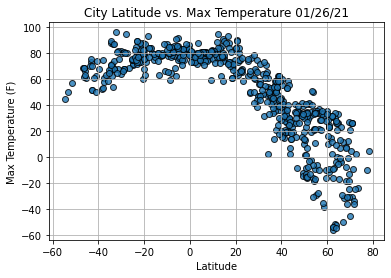

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

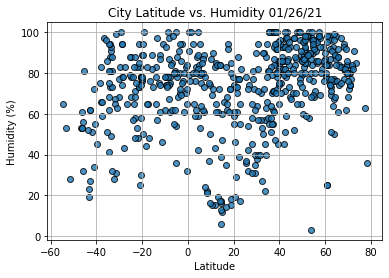

In [48]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

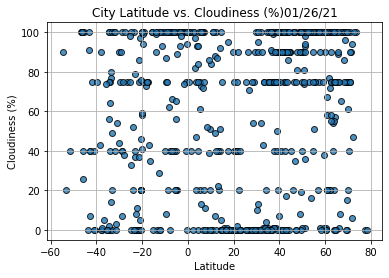

In [49]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

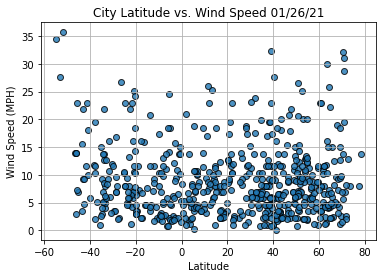

In [50]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [79]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(r_value)

In [80]:
index13 = city_data_df.loc[13]
index13

City                    Bundaberg
Country                        AU
Date          2021-01-26 18:55:19
Lat                        -24.85
Lng                        152.35
Max Temp                    71.01
Humidity                       88
Cloudiness                     33
Wind Speed                   8.05
Name: 13, dtype: object

In [81]:
city_data_df.loc[city_data_df['Lat'] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Evensk,RU,2021-01-26 18:55:17,61.9500,159.2333,2.28,87,100,10.80
1,Chokurdakh,RU,2021-01-26 18:55:17,70.6333,147.9167,-30.86,80,100,5.59
4,Leshukonskoye,RU,2021-01-26 18:55:17,64.8989,45.7622,33.35,98,100,4.21
8,Dauphin,CA,2021-01-26 18:55:18,51.1494,-100.0502,-14.80,70,1,3.44
9,Avera,US,2021-01-26 18:55:18,33.1940,-82.5271,71.01,90,75,6.91


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

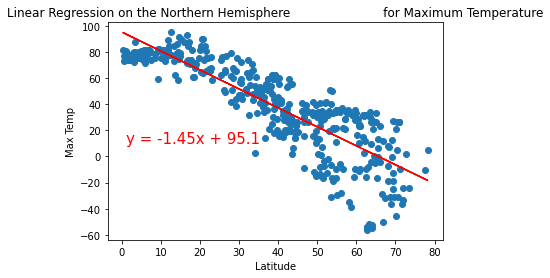

-0.8443082853621676


In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(1,10))

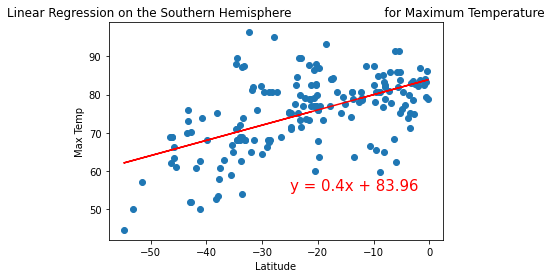

0.5586704395420395


In [84]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-25,55))

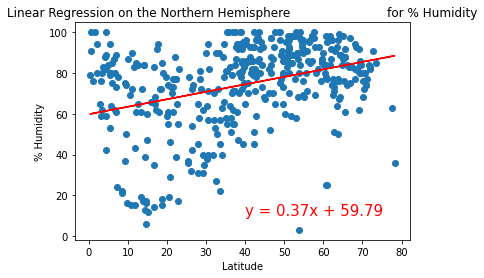

0.3467840754147104


In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

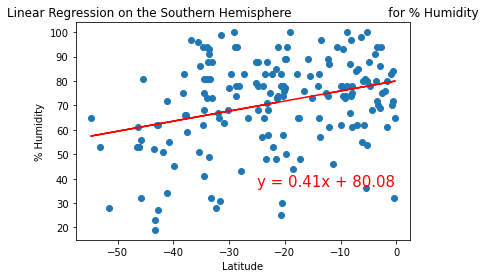

0.3089975227320193


In [93]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,37))

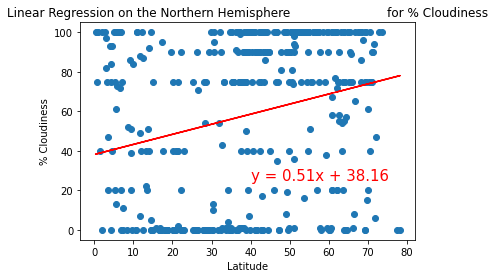

0.24911662374155696


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,25))

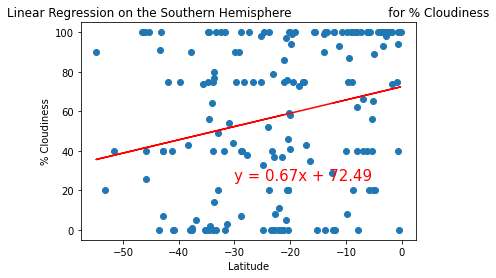

0.23689030128271374


In [96]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-30,25))

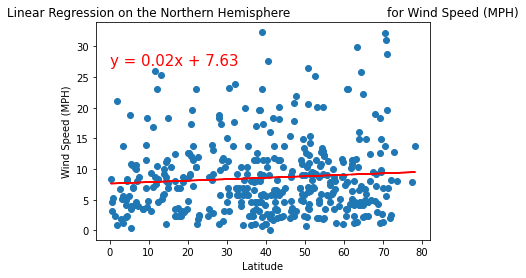

0.07795796239635276


In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (MPH)', 'Wind Speed (MPH)',(0,27))

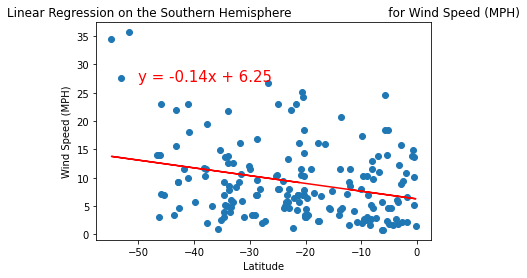

-0.278483709072554


In [101]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed (MPH)', 'Wind Speed (MPH)',(-50,27))